# Previously

We learned how to do validation pass where we learned about accuracy which is one of the performance metrics, improve performance and do inference.



# In this notebook, 

we will learn how to:
- save and load models in PyTorch 

**Why learn Saving and Loading Models?**
- you'll often want to load previously trained models to use in making predictions or to continue training on new data.
- it's impractical to train a network every time you need to use it

Thus,
we instead save trained networks then load them later to train more or use them for predictions.

# Preliminaries

## Downloading and Loading Data



In [1]:
# folks the helper package always goes in the way as with the previous notebooks
# so don't forget this one if you're running in colab

!wget https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py

# if this doesn't still get through by running, reset your runtime and
# it will work

# also don't forget to change your Hardware Accelerator above to GPU for faster processing

!wget https://raw.githubusercontent.com/lbleal1/deep-learning-v2-pytorch/master/intro-to-pytorch/fc_model.py

--2020-01-11 12:43:15--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]   2.75K  --.-KB/s    in 0s      

2020-01-11 12:43:15 (61.6 MB/s) - ‘helper.py’ saved [2813/2813]

--2020-01-11 12:43:17--  https://raw.githubusercontent.com/lbleal1/deep-learning-v2-pytorch/master/intro-to-pytorch/fc_model.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awa

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper
import fc_model

In [3]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

0it [00:00, ?it/s]

26427392it [00:02, 10152584.45it/s]                             


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


0it [00:00, ?it/s]

32768it [00:00, 74691.67it/s]                            
0it [00:00, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


4423680it [00:01, 3139157.75it/s]                            
0it [00:00, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


8192it [00:00, 26512.47it/s]            

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw
Processing...
Done!


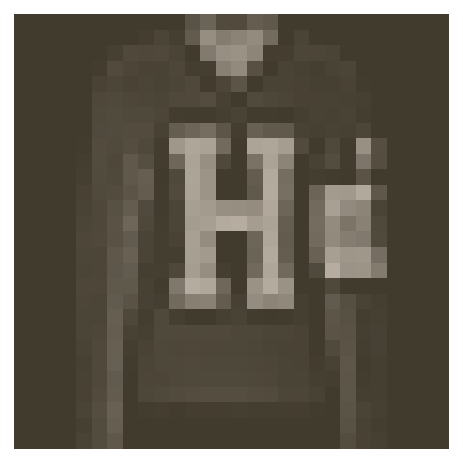

In [4]:
# looking at one of the images

image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

# Training the Network

To focus more in saving and loading model, we will be using `fc_model`

`fc_model`
- a file containing the model architecture and training code from the last part

1. Import `fc_model`
2. Create a fully-connected network with `fc_model.Network`
3. Train the network using `fc_model.train`

In [0]:
# Create the network, define the criterion and optimizer

model = fc_model.Network(784, 10, [512, 256, 128])
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [6]:
fc_model.train(model, trainloader, testloader, criterion, optimizer, epochs=2)

Epoch: 1/2..  Training Loss: 1.684..  Test Loss: 0.929..  Test Accuracy: 0.667
Epoch: 1/2..  Training Loss: 1.047..  Test Loss: 0.726..  Test Accuracy: 0.717
Epoch: 1/2..  Training Loss: 0.833..  Test Loss: 0.660..  Test Accuracy: 0.747
Epoch: 1/2..  Training Loss: 0.784..  Test Loss: 0.640..  Test Accuracy: 0.761
Epoch: 1/2..  Training Loss: 0.760..  Test Loss: 0.607..  Test Accuracy: 0.773
Epoch: 1/2..  Training Loss: 0.727..  Test Loss: 0.603..  Test Accuracy: 0.780
Epoch: 1/2..  Training Loss: 0.695..  Test Loss: 0.579..  Test Accuracy: 0.786
Epoch: 1/2..  Training Loss: 0.675..  Test Loss: 0.565..  Test Accuracy: 0.781
Epoch: 1/2..  Training Loss: 0.669..  Test Loss: 0.548..  Test Accuracy: 0.794
Epoch: 1/2..  Training Loss: 0.643..  Test Loss: 0.550..  Test Accuracy: 0.785
Epoch: 1/2..  Training Loss: 0.606..  Test Loss: 0.539..  Test Accuracy: 0.800
Epoch: 1/2..  Training Loss: 0.657..  Test Loss: 0.540..  Test Accuracy: 0.798
Epoch: 1/2..  Training Loss: 0.615..  Test Loss: 0.5

# (2) Two Ways to Save and Load Models

One of the key here is the model's `state_dict`

`state_dict`
- contains the weight and bias matrices for each of our layers




## 1. Saving and Loading only the Model Parameters
- here we only load and save `state_dict` 



In [7]:
# checking the state dict keys
print("Our model: \n\n", model, '\n')
print("The state dict keys: \n\n", model.state_dict().keys())

Our model: 

 Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
  )
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
) 

The state dict keys: 

 odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


In [0]:
# 1. Saving the model parameters to a file 'checkpoint.pth'
torch.save(model.state_dict(), 'checkpoint.pth')

In [9]:
# 2. Load it back
state_dict = torch.load('checkpoint.pth')
print(state_dict.keys())

odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


In [10]:
# 3. Then load it into a network
model.load_state_dict(state_dict)

<All keys matched successfully>

**Problem:**
- Since we're loading just the parameters, 

if the model architecture we're loading it into matches the checkpoint architecture:
  - this will only work 
  
else if different architecture
  - this fails


In [11]:
# Try this to see the problem
model = fc_model.Network(784, 10, [400, 200, 100])
# This will throw an error because the tensor sizes are wrong!
model.load_state_dict(state_dict)

RuntimeError: ignored

## 2. Saving and Loading the Network Architecture and Parameters

This means we're rebuilding the model exactly as it was when trained.  

In [0]:
# 1. Build a dictionary with all the information we need
# to completely rebuild the model
checkpoint = {'input_size': 784,
              'output_size': 10,
              'hidden_layers': [each.out_features for each in model.hidden_layers],
              'state_dict': model.state_dict()}

# 2. We save both the network architecture and its parameters
torch.save(checkpoint, 'checkpoint.pth')

In [0]:
# 3. Loading both the network architecture and its parameter
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = fc_model.Network(checkpoint['input_size'],
                             checkpoint['output_size'],
                             checkpoint['hidden_layers'])
    model.load_state_dict(checkpoint['state_dict'])
    
    return model

In [14]:
# 4. Loading the saved network architecture and parameters to the current model

model = load_checkpoint('checkpoint.pth')
print(model)

Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=400, bias=True)
    (1): Linear(in_features=400, out_features=200, bias=True)
    (2): Linear(in_features=200, out_features=100, bias=True)
  )
  (output): Linear(in_features=100, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


# Next Up

This actually finishes our basic workflow from downloading and loading data to saving and loading models just as we just finished.

The next question is, what if I do not download my dataset and want to use my own pictures? This will change our very first step and we'll learn how to load image data and the other details we haven't discussed before. 